#### Importing and visualizing data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#initialized ability to plot on notebook
%matplotlib inline

In [8]:
data = pd.read_csv("linear.csv")

# Remove any nan values
data.dropna(inplace=True)
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Text(0,0.5,'Sales')

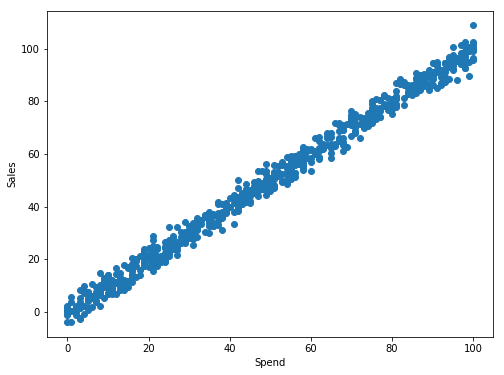

In [17]:
fig = plt.figure(figsize=(8,6)) ##sets up the canvas to plot on

#plots 
plt.scatter(x=data['x'], y=data['y'], marker='o')
plt.xlabel('Spend')
plt.ylabel('Sales')              

#### Implementing the Regression Model

In [19]:
def compute_parameters(feature, target):
    """
    Computing the regression coefficients:
    Params:
        feature: x variable predictor
        target: y to be predicted
    """
    
    numerator = np.sum(feature*target) - np.mean(target)*np.sum(feature)
    denominator = np.sum(feature*feature) - np.mean(feature)*np.sum(feature)
    beta = numerator/denominator
    
    alpha = np.mean(target) - beta*np.mean(feature)
    
    return alpha, beta

#### Calculating the coefficients

In [21]:
alpha, beta = compute_parameters(data['x'], data['y'])

In [22]:
print(alpha, beta)

-0.10726546430129247 1.0006563818563095


#### Predicting the Values

In [31]:
def predictions(alpha, beta, feature):
    """
    This function computes predictions
    Params: 
        alpha: intercept estimate
        beta: slope estimate
        feature: input/independent variable
    """
    prediction = alpha+beta*feature
    return prediction

In [32]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [33]:
data['pred'] = predictions(alpha, beta, data['x'] )
data.head()

,x,y,pred
0,24.0,21.549452,23.908488
1,50.0,47.464463,49.925554
2,15.0,17.218656,14.902580
3,38.0,36.586398,37.917677
4,87.0,87.288984,86.949840


#### Plot the results

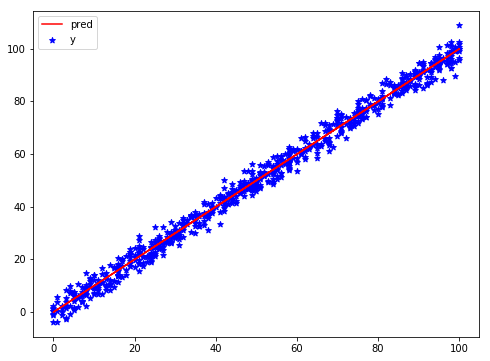

In [36]:
fig = plt.figure(figsize=(8,6)) ##sets up the canvas to plot on

#plots 
plt.scatter(data['x'], data['y'], color='blue', marker='*')
plt.plot(data['x'], data['pred'], color='red')
plt.legend()

### What is our linear model? 

Our linear model is:

$$ sales =  -0.10726546430129247 + 1.0006563818563095*spend $$

## Implementing Linear Model in SkLearn

In [37]:
from sklearn import linear_model

In [40]:
## Initialize 
model = linear_model.LinearRegression()

In [41]:
# Fit the model
model.fit( data[['x']], data['y'] ) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
model.coef_

array([ 1.00065638])

In [43]:
model.intercept_

-0.10726546430097272